# Sambhav Agrawal 19264 Data Science and Engineering

## Question 1 Submitted a pdf file for the same for pseudocode

It is an object detection framework proposed in 2001.It was primarily focuessed on face detection.It is a  pretrained algorithm like on front face, smile, eye and other facial features.The algorithm has 4 stages:
Haar feature selection, creating an integral image,adaboost training and cascading classifiers.

## Question 2 Viola-Jones

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

--2022-04-20 13:57:07--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2022-04-20 13:57:07 (15.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-04-20 13:57:08--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

In [ ]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## Face Detection

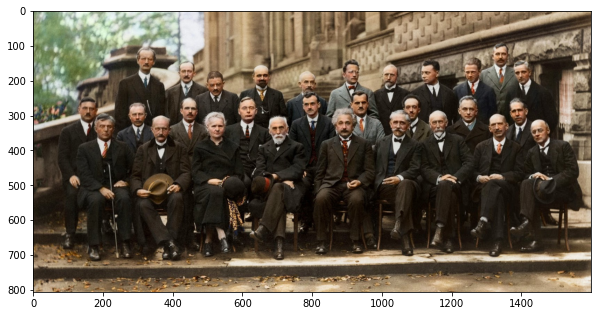

In [ ]:
image = cv2.imread('/content/violajonesface.jpg')
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

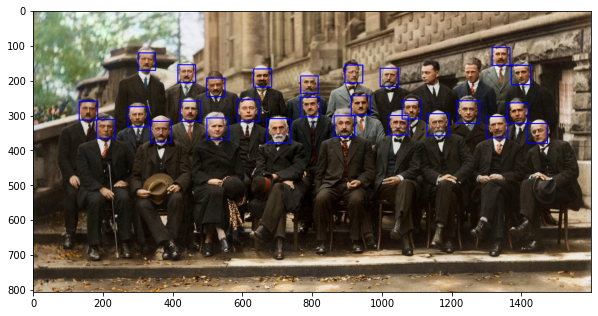

In [ ]:
test_image = cv2.imread('/content/violajonesface.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)


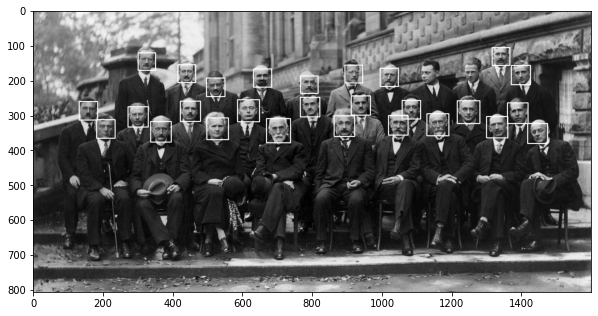

In [ ]:
# test_image = cv2.imread('/content/violajonesface.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Question 3

[INFO] 17 unique segments found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


-1

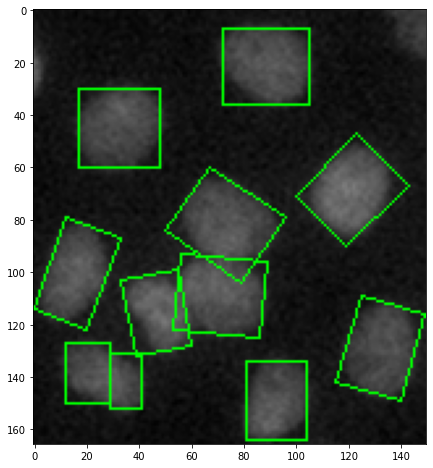

In [ ]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import cv2


# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread('/content/tounching_grayscale.png')
shifted = cv2.pyrMeanShiftFiltering(image, 41, 51)

# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
im = gray.copy()    
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=3,  
    labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then apply the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

conts=[]    
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)  
    if cv2.contourArea(c) > 150: 
        #cv2.drawContours(image,c,-1,(0,255,0))
        cv2.drawContours(image,[box],-1,(0,255,0))      
plt.imshow(image)
cv2.waitKey()

As we can see that in the question it was asked to separate the touching cells and in the output we could see that the three touching ones are completely separated with the help of bounding boxes.

## Question 4

In [ ]:
import pandas as pd
import imageio as iio
from skimage.measure import regionprops_table, label
import numpy as np
import matplotlib.pyplot as plt
image = np.asarray(iio.imread('/content/shapes.png'))
labeled = label(image > 0)  # ensure input is binary
data = regionprops_table(
        labeled,
        properties=('label', 'eccentricity'),
        )
table = pd.DataFrame(data)
table_sorted_by_ecc = table.sort_values(
        by='eccentricity', ascending=False
        )

# print e.g. the 10 most eccentric labels
print(table_sorted_by_ecc.iloc[:10])

   label  eccentricity
2      3      0.948645
0      1      0.866945
1      2      0.000000


## bounding box for shapes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

AttributeError: ignored

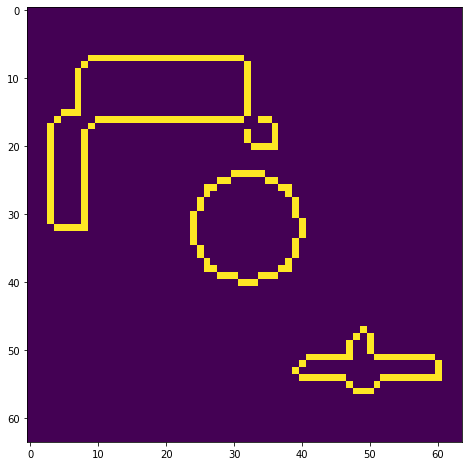

In [ ]:
import cv2
import matplotlib.pyplot as plt

import cv2

img = cv2.imread("/content/shapes.png")
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gry, (9, 9), 0)
cny = cv2.Canny(gry, 50, 200)
cnt, _ = cv2.findContours(gry, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img = cv2.drawContours(img, cnt, -1, (0, 0, 255), thickness=1)
plt.imshow( blr)
plt.imshow(cny)

plt.imshow(cnt.reshape(cnt.shape[0], cnt.shape[1]), cmap=plt.cm.Greys)


# plt.imshow(cnt)

Kindly ignore this error as I have taken output of the image without converting it but it does not make any difference to the number of contours present. It is detecting that there are 3 contours present.

In [ ]:
len(cnt)

3

In [ ]:
boxes = []
for c in cnt:
    (x, y, w, h) = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])
    cv2.rectangle(img, (x, y), ( x+w,y+h), (255, 0, 0), 2)

boxes = np.asarray(boxes)
left, top = np.min(boxes, axis=0)[:2]
right, bottom = np.max(boxes, axis=0)[2:]

# cv2.rectangle(img, (left,top), (right,bottom), (255, 0, 0), 2)

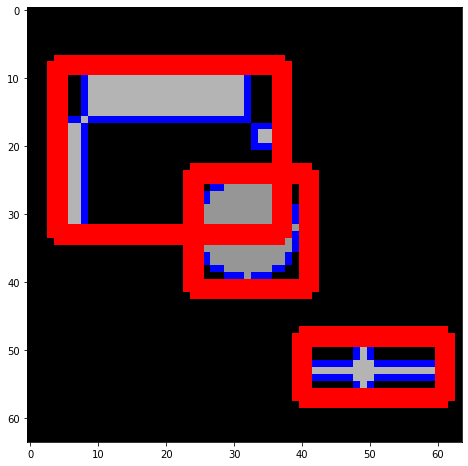

In [ ]:
plt.imshow(img)

## Question 5

Harris Corner Detector

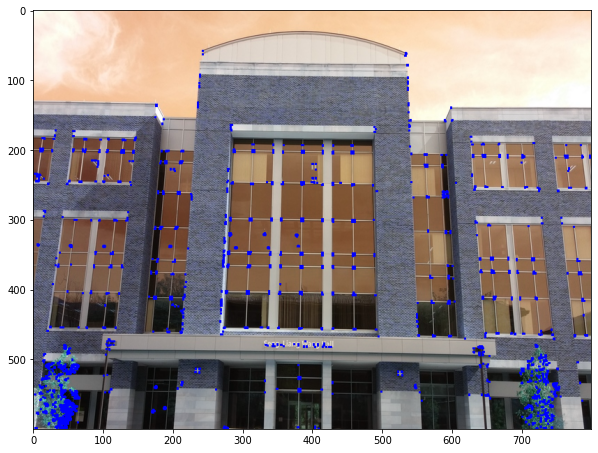

In [ ]:
import cv2
import numpy as np 
imput_img = '/content/buildingforharriscornerdetection.png'
ori = cv2.imread(imput_img)
image = cv2.imread(imput_img)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
image[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(ori) 
plt.imshow(image)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

ORB

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import datetime

begin1 = datetime.datetime.now()
img1 = cv.imread('/content/e4.jpg') 

img2 = cv.imread('/content/e6.jpg') 

# Make a copy of the image
image_c1 = np.copy(img1)
image_c1.setflags(write=1)
gray1= cv.cvtColor(image_c1,cv.COLOR_BGR2GRAY)

# Make a copy of the image
image_c2 = np.copy(img2)
image_c2.setflags(write=1)
gray2= cv.cvtColor(image_c2,cv.COLOR_BGR2GRAY)


time taken for ORB 0:00:00.028178


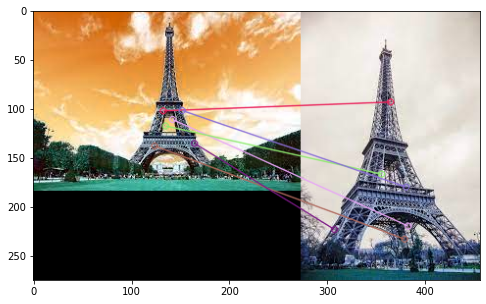

In [ ]:
begin3 = datetime.datetime.now()
orb = cv.ORB_create()

kp31, des31 = orb.detectAndCompute(gray1,None)

kp32, des32= orb.detectAndCompute(gray2,None)

bf = cv.BFMatcher()

matches = bf.knnMatch(des31,des32, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

IMG3 = cv.drawMatchesKnn(image_c1,kp31,image_c2,kp32,good,None,flags=2)
end3= datetime.datetime.now()
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(IMG3)
print('time taken for ORB',end=' ')
print(end3-begin3)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import datetime

begin1 = datetime.datetime.now()
img1 = cv.imread('/content/e4.jpg') 

img2 = cv.imread('/content/e5.jpg') 

# Make a copy of the image
image_c1 = np.copy(img1)
image_c1.setflags(write=1)
gray1= cv.cvtColor(image_c1,cv.COLOR_BGR2GRAY)

# Make a copy of the image
image_c2 = np.copy(img2)
image_c2.setflags(write=1)
gray2= cv.cvtColor(image_c2,cv.COLOR_BGR2GRAY)


time taken for ORB 0:00:00.016724


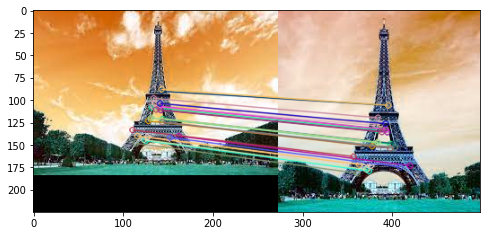

In [ ]:
begin3 = datetime.datetime.now()
orb = cv.ORB_create()

kp31, des31 = orb.detectAndCompute(gray1,None)

kp32, des32= orb.detectAndCompute(gray2,None)

bf = cv.BFMatcher()

matches = bf.knnMatch(des31,des32, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

IMG3 = cv.drawMatchesKnn(image_c1,kp31,image_c2,kp32,good,None,flags=2)
end3= datetime.datetime.now()
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(IMG3)
print('time taken for ORB',end=' ')
print(end3-begin3)

## Ransac algorithm


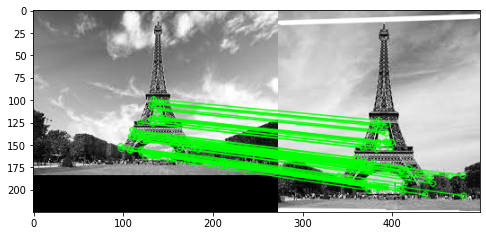

(<matplotlib.image.AxesImage at 0x7f4700d61310>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv.imread('/content/e4.jpg',0)          # queryImage
img2 = cv.imread('/content/e5.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv.ORB_create(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, WTA_K=2,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=500)

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

# Then set number of searches. Higher is better, but takes longer
search_params = dict(checks=100)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0) # computing the homography on the 2 images using  set of points.

    matchesMask = mask.ravel().tolist()

    try:
        h,w,d = img1.shape
    except:
        h, w = img1.shape

    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

## Explanation for question 5

SURF stands for Speeded up robust features as it speeds up the computations by taking fast approximations of the hessian matrix and the descriptor using integral images.The integral image of an image I represents the sum of all pixels in I(x,y) of rectangular region formed by (0,0) and (x,y).It takes only four array references to calculate sum of pixels over any rectangular region of any size.

SURF uses determinant of hessian matrix to find both.There are two steps one is orientation assignment and other is keypoint descriptor. It is less robust to illumination and view point changes than SIFT.

RANSAC full form is Random Sample Consensus. It is used for relative camera pose and perspective transform estimation.

## Question 6 done separately in new python notebook.

## Question 7

SVM classifier on MNIST

In [ ]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# from sklearn.externals import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from tensorflow.keras.layers import Dense


import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# assert x_train.shape == (60000, 28, 28)
# assert x_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

In [ ]:
def HOG(X, image_shape=(28, 28), pixels_per_cell=(2, 2)):
    feature_matrix = []
    for row in X:
        img = row.reshape(image_shape)
        fd = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(2, 2))
        feature_matrix.append(fd)
    
    return np.array(feature_matrix)

In [ ]:
X_train = HOG(x_train, pixels_per_cell=(2, 2))

X_test = HOG(x_test, pixels_per_cell=(2, 2))


In [ ]:
X_train.shape


(60000, 5408)

In [ ]:
X_test.shape


(10000, 5408)

In [ ]:
from sklearn import svm

supportVectorModel = svm.LinearSVC()

In [ ]:
supportVectorModel.fit(X_train, y_train)


LinearSVC()

In [ ]:
SVM_predictions = supportVectorModel.predict(X_test)


In [ ]:
SVM_accuracy = metrics.accuracy_score(y_test, SVM_predictions)


In [ ]:
SVM_accuracy


0.978